<a href="https://colab.research.google.com/github/valeCab/BasicStatistics/blob/main/FinalProjectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import sys, pandas
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [45]:
import pandas as pd
import seaborn as sns

In [46]:
df_health = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthExpenditure.csv', skiprows=3)
df_life = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LifeExpectancy.csv', skiprows=3)

print("Health Expenditure Data:")
print(df_health.head())

print("\nLife Expectancy Data:")
print(df_life.head())

Health Expenditure Data:
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                          Indicator Name     Indicator Code  1960  1961  1962  \
0  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
1  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
2  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
3  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   
4  Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   NaN   NaN   NaN   

   1963  1964  1965  ...       2015       2016       2017       2018  \
0   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
1   NaN   NaN   NaN  ...   5.997956   6.097888   5.968235   5

In [47]:
# Data from 2015-2021
years = [str(y) for y in range(2015, 2022)]
columns = ['Country Name'] + years

df_health = df_health[columns]
df_life = df_life[columns]

In [48]:
# Data from US and Bangladesh
df_health_us = df_health[df_health['Country Name'] == 'United States']
df_health_bd = df_health[df_life['Country Name'] == 'Bangladesh']

df_life_us = df_life[df_life['Country Name'] == 'United States']
df_life_bd = df_life[df_life['Country Name'] == 'Bangladesh']

df_health_us = df_health_us.drop(columns=['Country Name'])
df_health_bd = df_health_bd.drop(columns=['Country Name'])

df_life_us = df_life_us.drop(columns=['Country Name'])
df_life_bd = df_life_bd.drop(columns=['Country Name'])

print("Health Expenditure Data for United States:")
print(df_health_us.head())

print("\nLife Expectancy Data for United States:")
print(df_life_us.head())

print("\nHealth Expenditure Data for Bangladesh:")
print(df_health_bd.head())

print("\nLife Expectancy Data for Bangladesh:")
print(df_life_bd.head())

Health Expenditure Data for United States:
          2015       2016       2017       2018       2019      2020  \
251  16.490568  16.802158  16.767502  16.629644  16.665806  18.75622   

          2021  
251  17.362568  

Life Expectancy Data for United States:
          2015       2016       2017       2018       2019       2020  \
251  78.690244  78.539024  78.539024  78.639024  78.787805  76.980488   

          2021  
251  76.329268  

Health Expenditure Data for Bangladesh:
        2015      2016      2017      2018      2019      2020     2021
20  2.272177  2.389382  2.367202  2.316222  2.257622  2.270639  2.36493

Life Expectancy Data for Bangladesh:
      2015   2016    2017    2018    2019    2020    2021
20  70.491  71.09  71.788  72.567  72.806  71.968  72.381


In [49]:
# Basic Statistics

years = [str(y) for y in range(2015, 2022)]

us_data = {
    'Country': ['United States'] * len(years),
    'Year': years,
    'Health Expenditure (% of GDP)': df_health_us[years].values.flatten(),
    'Life Expectancy (Years)': df_life_us[years].values.flatten()
}

bd_data = {
    'Country': ['Bangladesh'] * len(years),
    'Year': years,
    'Health Expenditure (% of GDP)': df_health_bd[years].values.flatten(),
    'Life Expectancy (Years)': df_life_bd[years].values.flatten()
}


df_combined = pd.concat([pd.DataFrame(us_data), pd.DataFrame(bd_data)], ignore_index=True)

df_combined['Health Expenditure (% of GDP)'] = df_combined['Health Expenditure (% of GDP)'].astype(float)
df_combined['Life Expectancy (Years)'] = df_combined['Life Expectancy (Years)'].astype(float)
print("\nBasic Statistics:")
df_combined.describe()


Basic Statistics:


,Health Expenditure (% of GDP),Life Expectancy (Years)
count,14.000000,14.000000
mean,9.693760,74.971134
std,7.671473,3.335777
min,2.257622,70.491000
25%,2.328399,72.071250
50%,9.439975,74.567634
75%,16.742078,78.539024
max,18.756220,78.787805


In [50]:
# Missing values
print("Missing Values in Health Expenditure:")
print(df_health.isnull().sum())

print("\nMissing Values in Life Expectancy:")
print(df_life.isnull().sum())

Missing Values in Health Expenditure:
Country Name     0
2015            32
2016            33
2017            32
2018            31
2019            31
2020            31
2021            31
dtype: int64

Missing Values in Life Expectancy:
Country Name    0
2015            8
2016            8
2017            8
2018            9
2019            9
2020            9
2021            8
dtype: int64


In [51]:
# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

df1 = df_combined['Health Expenditure (% of GDP)']
df2 = df_combined['Life Expectancy (Years)']

print(f"Skewness of Health Expenditure: {skew(df1)}")
print(f"Kurtosis of Health Expenditure: {kurtosis(df1)}")

print(f"\nSkewness of Life Expectancy: {skew(df2)}")
print(f"Kurtosis of Life Expectancy: {kurtosis(df2)}")

Skewness of Health Expenditure: 0.015523495121309419
Kurtosis of Health Expenditure: -1.9769013619165305

Skewness of Life Expectancy: 0.018699573253498938
Kurtosis of Life Expectancy: -1.7673080328176227


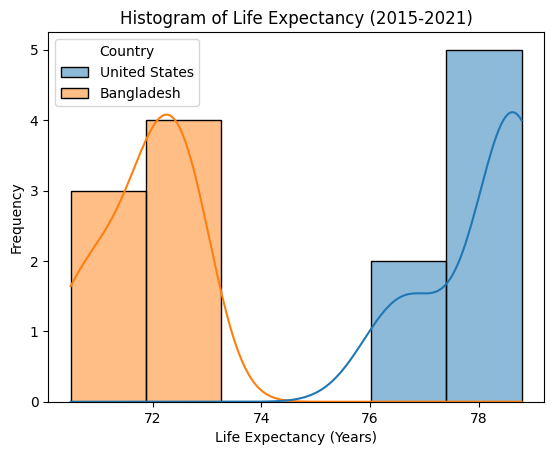

In [52]:
# Histogram
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df_combined, x="Life Expectancy (Years)", hue="Country", bins=6, kde=True)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.title("Histogram of Life Expectancy (2015-2021)")
plt.show()

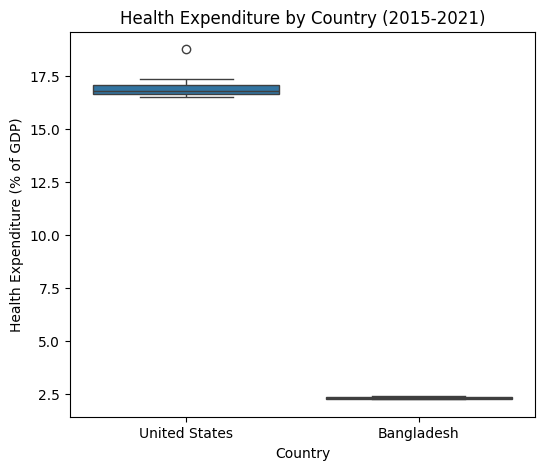

In [53]:
# Multiple Box Plots
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.boxplot(x='Country', y='Health Expenditure (% of GDP)', data=df_combined)
plt.xlabel('Country')
plt.ylabel('Health Expenditure (% of GDP)')
plt.title('Health Expenditure by Country (2015-2021)')
plt.show()
# there is little to no variation, the data points are very close

In [54]:
# Statistics
df_combined.describe()

,Health Expenditure (% of GDP),Life Expectancy (Years)
count,14.000000,14.000000
mean,9.693760,74.971134
std,7.671473,3.335777
min,2.257622,70.491000
25%,2.328399,72.071250
50%,9.439975,74.567634
75%,16.742078,78.539024
max,18.756220,78.787805


In [55]:
# Visualizations

# Pearson r correlation coefficient
from scipy.stats import pearsonr

x = df_combined['Health Expenditure (% of GDP)']
y = df_combined['Life Expectancy (Years)']

r, p = pearsonr(x, y)
print(f'Pearson r: {r}, p-value: {p}')


Pearson r: 0.9516394951448418, p-value: 1.6634084891536534e-07


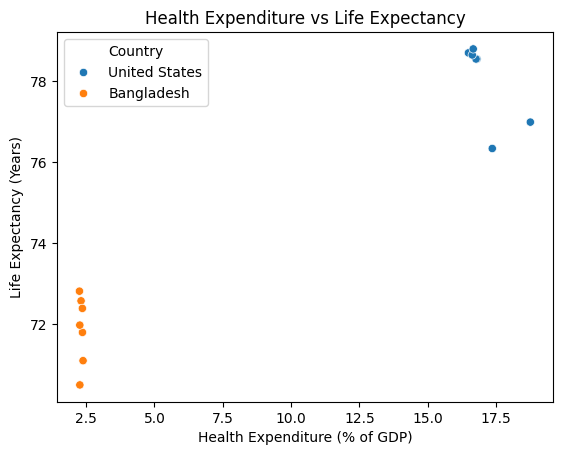

In [56]:
# Scatter Plot

sns.scatterplot(data=df_combined, x='Health Expenditure (% of GDP)', y='Life Expectancy (Years)', hue='Country')
plt.title('Health Expenditure vs Life Expectancy')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

The scatter plot compares health expenditure and life expectancy. The plot shows that the US spends more in health expenditure and they have a higher life expectancy.

In [57]:
# T-test

from scipy.stats import ttest_ind

us_life = df_combined[df_combined['Country'] == 'United States']['Life Expectancy (Years)']
ban_life = df_combined[df_combined['Country'] == 'Bangladesh']['Life Expectancy (Years)']

t_stat, p_value = ttest_ind(us_life, ban_life)
print(f't-test= {t_stat}, p-value= {p_value}')

t-test= 12.691101362930148, p-value= 2.5850968207869863e-08


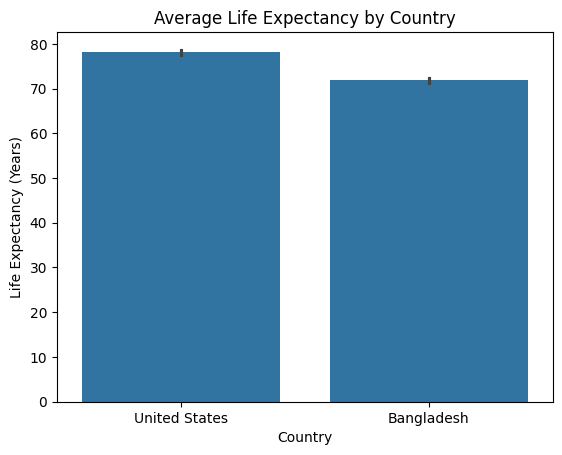

In [58]:
# Bar chart

sns.barplot(data=df_combined, x='Country', y='Life Expectancy (Years)', estimator='mean')
plt.title('Average Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.show()

In [59]:
# ANOVA

from scipy.stats import f_oneway

us_exp = df_combined[df_combined['Country'] == 'United States']['Health Expenditure (% of GDP)']
ban_exp = df_combined[df_combined['Country'] == 'Bangladesh']['Health Expenditure (% of GDP)']

f_stat, p_value = f_oneway(us_exp, ban_exp)
print(f'ANOVA f= {f_stat}, p-value= {p_value}')

ANOVA f= 2402.192129292025, p-value= 3.4095394515856064e-15


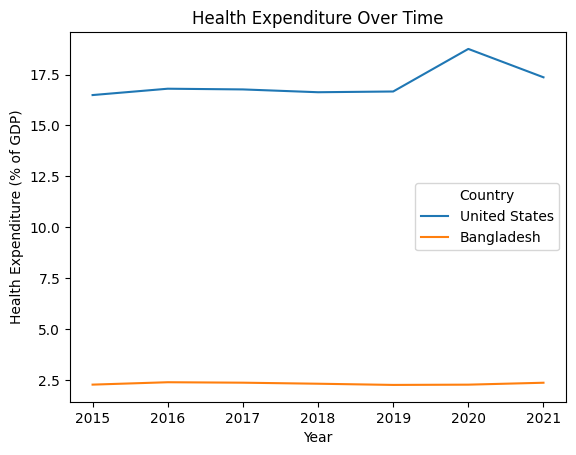

In [60]:
sns.lineplot(data=df_combined, x='Year', y='Health Expenditure (% of GDP)', hue='Country')
plt.title('Health Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Health Expenditure (% of GDP)')
plt.show()